<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/Hands_on_EDA_%26_Preprocessing_Reem_Younis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading from Drive

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

from sklearn  import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
# Import label encoder
from sklearn import preprocessing



import pandas as pd
import numpy as np

In [ ]:
#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


#EDA

In [ ]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df=df.drop(columns=['Notes','Status','Id','Agency','EmployeeName']).reset_index(drop=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148045 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          112491 non-null  float64
 5   TotalPay          148654 non-null  float64
 6   TotalPayBenefits  148654 non-null  float64
 7   Year              148654 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB


In [ ]:
df.isna().sum()

JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [ ]:
df['BasePay']=df['BasePay'].fillna(df['BasePay'].mean(numeric_only=True))
df['OvertimePay']=df['OvertimePay'].fillna(df['OvertimePay'].mean(numeric_only=True))
df['OtherPay']=df['OtherPay'].fillna(df['OtherPay'].mean(numeric_only=True))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148654 non-null  float64
 2   OvertimePay       148654 non-null  float64
 3   OtherPay          148654 non-null  float64
 4   Benefits          112491 non-null  float64
 5   TotalPay          148654 non-null  float64
 6   TotalPayBenefits  148654 non-null  float64
 7   Year              148654 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB


In [ ]:
df.duplicated().sum()

4763

In [ ]:
df =df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.JobTitle.nunique()

2159

In [ ]:
df.loc[:2159,'JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC',
       'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
       'ASSISTANT DEPUTY CHIEF II', 'BATTALION CHIEF, (FIRE DEPARTMENT)',
       'DEPUTY DIRECTOR OF INVESTMENTS',
       'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'EXECUTIVE CONTRACT EMPLOYEE', 'DEPARTMENT HEAD V',
       'COMMANDER III, (POLICE DEPARTMENT)',
       'CAPTAIN, EMERGENCYCY MEDICAL SERVICES',
       'ASSISTANT MEDICAL EXAMINER', 'CAPTAIN, FIRE SUPPRESSION',
       'CHIEF OF POLICE', 'DEPUTY CHIEF III (POLICE DEPARTMENT)',
       'INSPECTOR III, (POLICE DEPARTMENT)',
       'ELECTRONIC MAINTENANCE TECHNICIAN',
       'ADMINISTRATOR, SFGH MEDICAL CENTER',
       'LIEUTENANT III (POLICE DEPARTMENT)', 'FIREFIGHTER',
       'NURSING SUPERVISOR PSYCHIATRIC', 'MAYOR',
       'LIEUTENANT, FIRE DEPARTMENT', 'INCIDENT 

In [ ]:
df=df.sort_values(by="JobTitle").reset_index(drop=True)

In [ ]:
police_dep = [x for x in df.JobTitle if any(word in x.lower() for word in ["police","sheriff"])]
fire_dep =[x for x in df.JobTitle if any(word in x.lower() for word in ["fire", "emerg"])and x not in police_dep]
civil_criminal = [x for x in df.JobTitle if any(word in x.lower() for word in ["criminal", "attorney", "court","cnselor","counselor","law","juv","cle"])and x not in police_dep and x not in fire_dep]
medical = [x for x in df.JobTitle if any(word in x.lower() for word in ["hospital","nurs", "pharma", "med", "toxicologist", "anesthetist", "diagnostic", "physician","dent","radio","orthopedic ","microphoto","lab","health","surg","psych","epidemiologist","electroencephalograph","patient","therap","clinic","patho"])and x not in police_dep and x not in fire_dep and x not in civil_criminal]
engineer = [x for x in df.JobTitle if x!=("lib"or"finger") and any(word in x.lower() for word in ["eng", "maintenance", "mech", "architect","electr","proj","apprentice","auto","communication","metal","weld","cement","transport","techn","power","prog","comp","equipment"]) and x not in police_dep and x not in fire_dep and x not in civil_criminal and x not in medical]


In [ ]:
# Convert the lists to sets for faster lookup
police_dep_set = set(police_dep)
fire_dep_set = set(fire_dep)
civil_criminal_set = set(civil_criminal)
engineer_set = set(engineer)
medical_set = set(medical)

# Use a generator expression instead of a list comprehension to save memory
others = pd.Series((x for x in df_upt.JobTitle if not x in police_dep_set and not x in fire_dep_set and not x in civil_criminal_set and not x in engineer_set and not x in medical_set), name="Others/General")

In [ ]:
unique_others=pd.Series(others.unique())
for element in unique_others:
    print(element)

ACCOUNTANT
ACCOUNTANT INTERN
ACUPUNCTURIST
ADMINISTRATIVE ANALYST
ADMINISTRATIVE ANALYST II
ADMINISTRATIVE ANALYST III
ADMINISTRATIVE SERVICES MANAGER
AFFIRMATIVE ACTION SPECIALIST
AGRICULTURAL INSPECTOR
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS
AIRPORT ECONOMIC PLANNER
AIRPORT NOISE ABATEMENT SPECIALIST
AIRPORT OPERATIONS SUPERVISOR
AIRPORT PROPERTY SPECIALIST I
AIRPORT SAFETY OFFICER
ANIMAL CARE ASSISTANT SUPERVISOR
ANIMAL CARE ATTENDANT
ANIMAL CARE SUPERVISOR
ANIMAL CONTROL OFFICER
ANIMAL KEEPER
AREA SUPERVISOR, PARKS, SQUARES AND FACILITIES
ASPHALT FINISHER
ASPHALT FINISHER SUPERVISOR I
ASPHALT PLANT SUPERVISOR I
ASPHALT WORKER
ASR Senior Office Specialist
ASR-Office Assistant
ASSESSOR
ASSISTANT CHIEF VICTIM/WITNESS INVESTIGATOR
ASSISTANT CONSTRUCTION INSPECTOR
ASSISTANT COOK
ASSISTANT DEPUTY CHIEF II
ASSISTANT DEPUTY DIRECTOR, PORT
ASSISTANT DIRECTOR, LOG CABIN RANCH
ASSISTANT GENERAL SERVICES MANAGER
ASSISTANT INDUSTRIAL HYGI

In [ ]:
df_upt=df.drop(df[df['JobTitle'] == 'Not provided'].index).reset_index(drop=True)
df_upt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143890 entries, 0 to 143889
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          143890 non-null  object 
 1   BasePay           143890 non-null  float64
 2   OvertimePay       143890 non-null  float64
 3   OtherPay          143890 non-null  float64
 4   Benefits          109594 non-null  float64
 5   TotalPay          143890 non-null  float64
 6   TotalPayBenefits  143890 non-null  float64
 7   Year              143890 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ MB


In [ ]:
df_upt.isnull().sum()

JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            34296
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [ ]:
others=others.tolist()
others


['ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACCOUNTANT INTERN',
 'ACUPUNCTURIST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMINISTRATIVE ANALYST',
 'ADMI

In [ ]:
police_dep_dict = {"Police Department":police_dep}
fire_dep_dict = {"Fire Department":fire_dep}
civil_criminal_dict = {"Civil and Criminal Department":civil_criminal}
engineer_dict = {"Engineering Department":engineer}
medical_dict = {"Medical Department":medical}
others_dict = {"Other/General Departments":others}

engineer_dict.values()

dict_values([['ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE ENGINEER', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNI

In [ ]:
# Create a dictionary mapping each department value to its department name
value_to_name = {}
for department_dict in [police_dep_dict, fire_dep_dict, civil_criminal_dict, engineer_dict, medical_dict,others_dict]:
    for department_name, department_values in department_dict.items():
        for value in department_values:
            value_to_name[value] = department_name

# Define a function to extract the department from a job title
def extract_department(job_title):
    for value, name in value_to_name.items():
        if value in job_title:
            return name  # Return the department name if a value is found in the job title
    return None  # Return None if no match is found
# Apply the function to the "JobTitle" column and create a new "Departments" column
df_upt["Departments"] = df_upt["JobTitle"].apply(extract_department)

print(df_upt.loc[df_upt["Departments"]=="Other/General Departments"])

                  JobTitle   BasePay  OvertimePay  OtherPay  Benefits  \
72              ACCOUNTANT      0.00          0.0   1148.40       NaN   
73              ACCOUNTANT  65225.31          0.0      0.00       NaN   
74              ACCOUNTANT  42522.30          0.0   2782.08       NaN   
75              ACCOUNTANT  60076.24          0.0      0.00       NaN   
76              ACCOUNTANT  65392.01          0.0      0.00       NaN   
...                    ...       ...          ...       ...       ...   
143885  Youth Comm Advisor  57544.73          0.0      0.00  28229.66   
143886  Youth Comm Advisor  13915.80          0.0   5296.91   5744.53   
143887  Youth Comm Advisor  32417.42          0.0   4048.49  15545.28   
143888  Youth Comm Advisor  52433.88          0.0      0.00  25297.50   
143889         ZOO CURATOR  43148.00          0.0  23538.56       NaN   

        TotalPay  TotalPayBenefits  Year                Departments  
72       1148.40           1148.40  2011  Other/Gener

In [ ]:
df_upt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143890 entries, 0 to 143889
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          143890 non-null  object 
 1   BasePay           143890 non-null  float64
 2   OvertimePay       143890 non-null  float64
 3   OtherPay          143890 non-null  float64
 4   Benefits          109594 non-null  float64
 5   TotalPay          143890 non-null  float64
 6   TotalPayBenefits  143890 non-null  float64
 7   Year              143890 non-null  int64  
 8   Departments       143890 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 9.9+ MB


In [ ]:
print(df_upt.loc[df_upt["Departments"]=="Medical Department"])

                                  JobTitle    BasePay  OvertimePay  OtherPay  \
205     ADMINISTRATOR, SFGH MEDICAL CENTER  245124.44         0.00  12000.00   
531                            ANESTHETIST   26485.47         0.00   2865.88   
532                            ANESTHETIST    2145.00         0.00    965.25   
533                            ANESTHETIST  214745.44      9161.31  14972.45   
534                            ANESTHETIST  187094.56      2341.63  11051.55   
...                                    ...        ...          ...       ...   
143879               X-Ray Laboratory Aide   64201.40      1862.97    912.72   
143880               X-Ray Laboratory Aide    1007.00         0.00      0.00   
143881               X-Ray Laboratory Aide   64448.00     25894.58   2481.04   
143882               X-Ray Laboratory Aide   50394.17      5380.59    250.00   
143883               X-Ray Laboratory Aide   27471.93         0.00    250.00   

        Benefits   TotalPay  TotalPayBe

In [ ]:
print(df_upt.loc[df_upt["Departments"]=="Civil and Criminal Department"])

                         JobTitle   BasePay  OvertimePay  OtherPay  Benefits  \
0                   ACCOUNT CLERK  29553.77         0.00    427.80       NaN   
1                   ACCOUNT CLERK  49493.00         0.00      0.00       NaN   
2                   ACCOUNT CLERK  49740.68         0.00      0.00       NaN   
3                   ACCOUNT CLERK  49768.90         0.00      0.00       NaN   
4                   ACCOUNT CLERK  49777.78         0.00      0.00       NaN   
...                           ...       ...          ...       ...       ...   
143635             Window Cleaner  69539.51         0.00   4160.23  32748.42   
143636             Window Cleaner      0.00        48.79   5613.82    983.81   
143637  Window Cleaner Supervisor  77497.03         0.00   2577.50  31011.32   
143638  Window Cleaner Supervisor  77937.93       497.37    698.65  29265.04   
143639  Window Cleaner Supervisor  72006.29         0.00   1322.71  32837.79   

        TotalPay  TotalPayBenefits  Yea

In [ ]:
print(df_upt.loc[df_upt["Departments"]=="Engineering Department"])

                              JobTitle    BasePay  OvertimePay  OtherPay  \
192            ADMINISTRATIVE ENGINEER  136679.61          0.0      0.00   
193            ADMINISTRATIVE ENGINEER  128923.30          0.0      0.00   
194            ADMINISTRATIVE ENGINEER   72259.20          0.0  19574.13   
195            ADMINISTRATIVE ENGINEER  130171.05          0.0      0.00   
196            ADMINISTRATIVE ENGINEER  103219.63          0.0  46102.60   
...                                ...        ...          ...       ...   
143753  Worker's Compensation Adjuster   60220.75          0.0    865.82   
143754  Worker's Compensation Adjuster   85185.03          0.0    648.00   
143755  Worker's Compensation Adjuster   81134.84          0.0      0.00   
143756  Worker's Compensation Adjuster   79704.83          0.0      0.00   
143757  Worker's Compensation Adjuster   65009.00          0.0      0.00   

        Benefits   TotalPay  TotalPayBenefits  Year             Departments  
192      

In [ ]:
# Encode labels in column 'species'.
label_encoder = preprocessing.LabelEncoder()
df_upt['JobTitle']= label_encoder.fit_transform(df_upt['JobTitle'])

df_upt['JobTitle'].unique()

array([   0,    1,    2, ..., 2155, 2156, 2157])

In [ ]:
df_upt["Departments"].unique()

array(['Civil and Criminal Department', 'Other/General Departments',
       'Engineering Department', 'Medical Department', 'Fire Department',
       'Police Department'], dtype=object)

In [ ]:
df_upt["Departments"]= label_encoder.fit_transform(df_upt["Departments"])

df_upt["Departments"].unique()

array([0, 4, 1, 3, 2, 5])

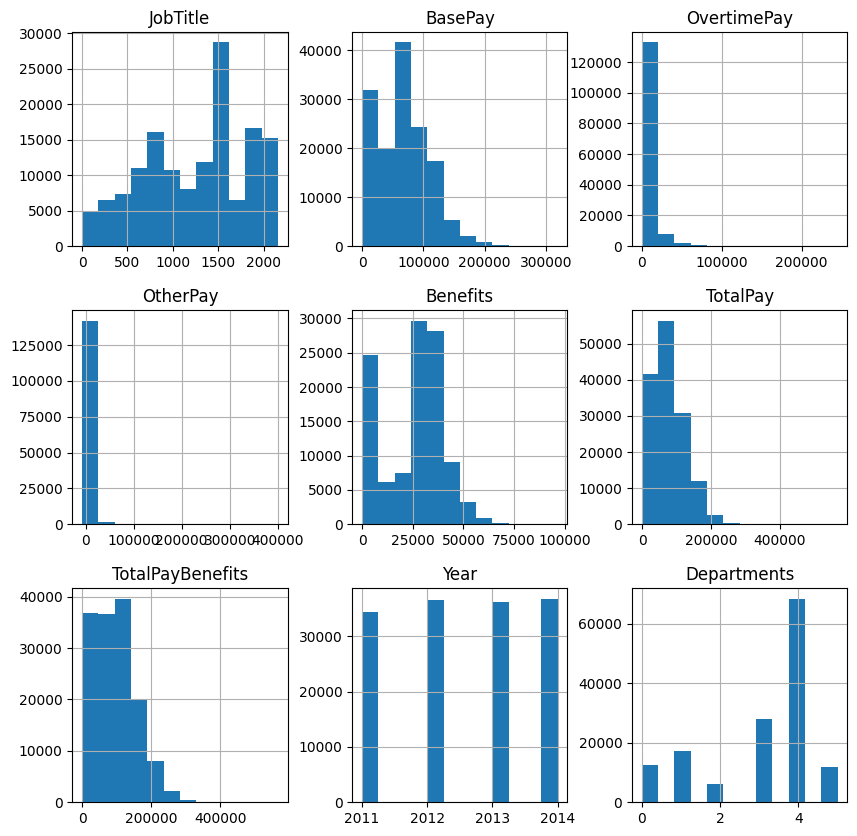

In [ ]:
df_upt.hist(bins=12,figsize=(10,10))
plt.show()

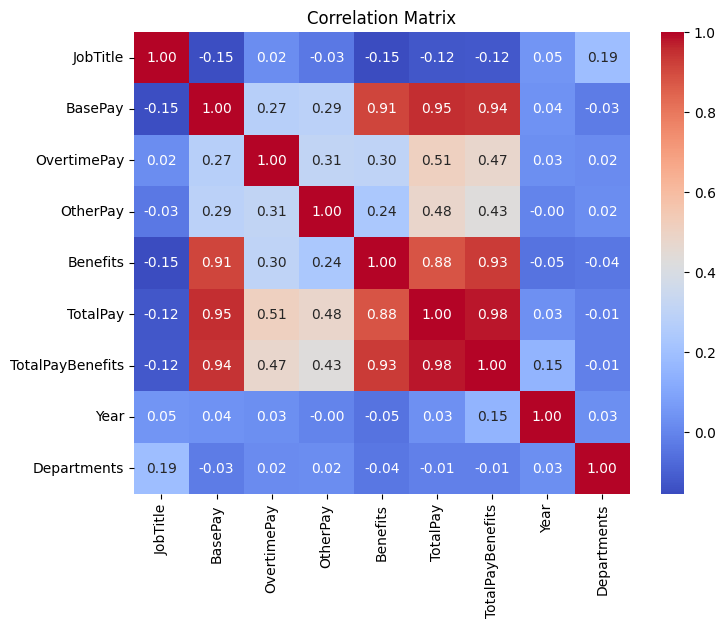

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_upt.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_upt=df_upt.drop(columns=['JobTitle'])

In [ ]:
df_upt.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Departments
count,143890.000000,143890.000000,143890.000000,109594.000000,143890.000000,143890.000000,143890.000000,143890.000000
mean,66240.956575,5231.971343,3760.166071,25068.460168,75031.660803,94125.085111,2012.524540,3.095351
std,42455.798932,11605.189986,8161.892044,15375.516779,50493.854874,62803.018787,1.112465,1.449145
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,0.000000
25%,34188.117500,0.000000,0.000000,11967.577500,36798.210000,44845.775000,2012.000000,3.000000
50%,64965.405000,0.000000,894.100000,28655.455000,71439.215000,92661.475000,2013.000000,4.000000
75%,94191.050000,4963.417500,4429.800000,35596.292500,106018.292500,133286.507500,2014.000000,4.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,5.000000


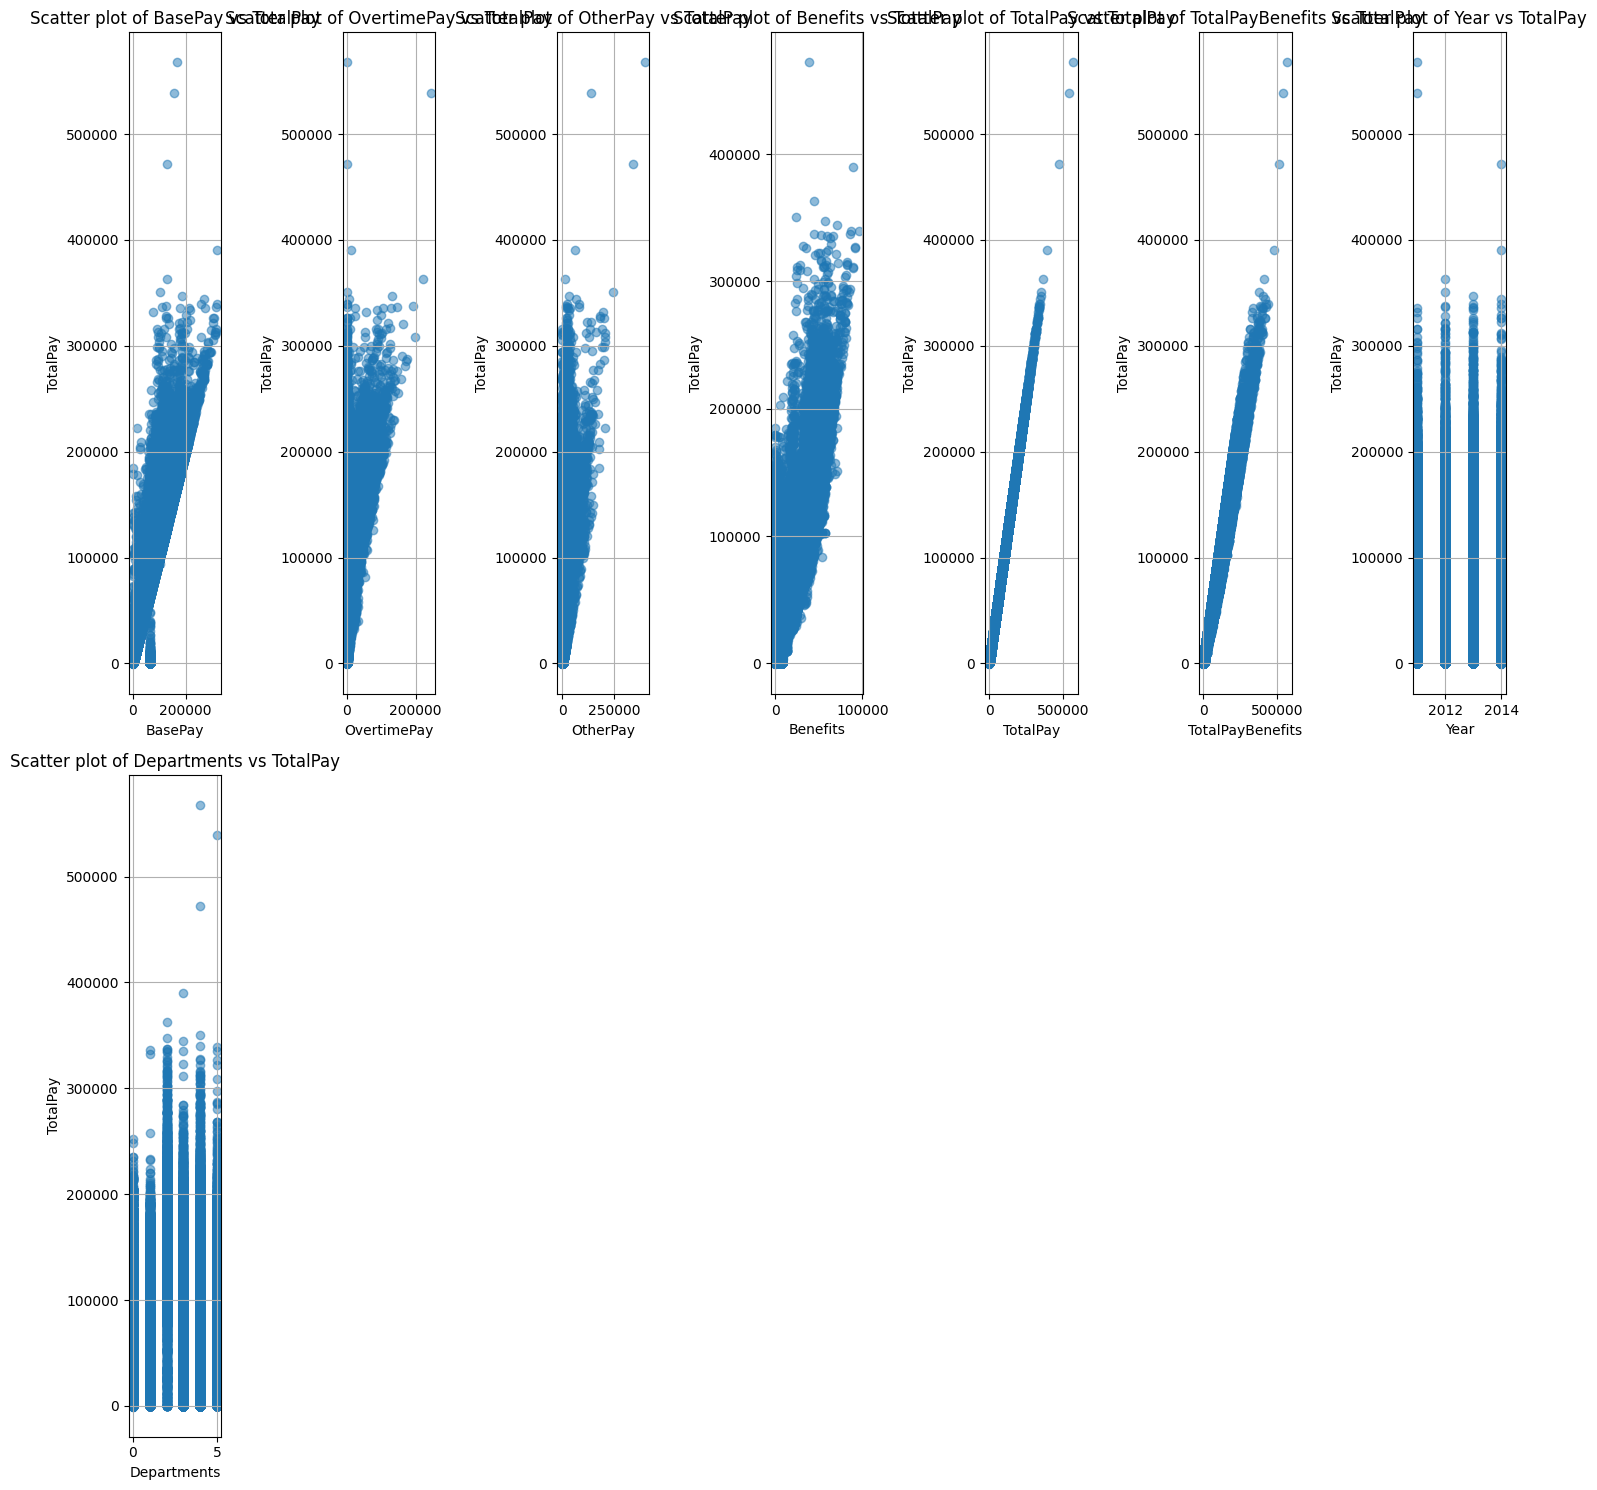

In [ ]:
fig, axs = plt.subplots(2, 7, figsize=(15,15))
axs = axs.flatten()
# Plot scatter plots for each feature column against the target column
for i, column in enumerate(df_upt.columns):
    axs[i].scatter(df_upt[column], df_upt['TotalPay'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {column} vs TotalPay')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('TotalPay')
    axs[i].grid(True)

# Hide empty subplots
for i in range(len(df_upt.columns), 2 * 7):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

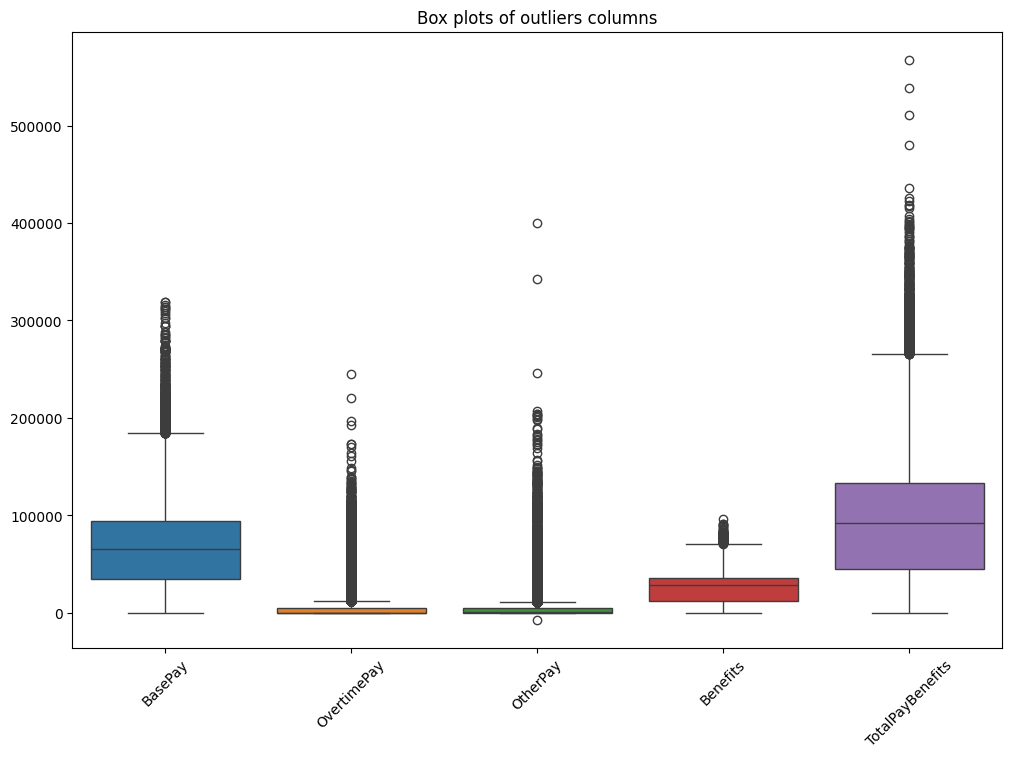

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df_upt[['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
def remove_outliers_iqr(df, multiplier=1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)]

In [ ]:
df1 = df_upt.copy()
df1[["BasePay","OvertimePay","OtherPay","TotalPayBenefits"]] = remove_outliers_iqr(df1[["BasePay","OvertimePay","OtherPay","TotalPayBenefits"]])


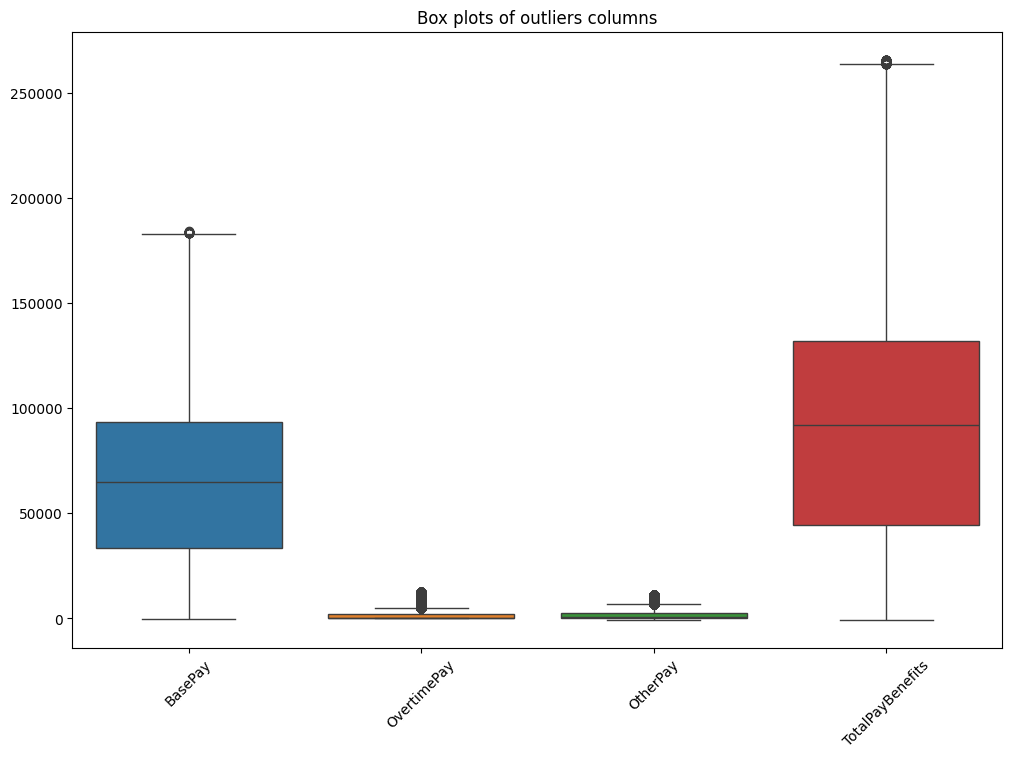

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df1[["BasePay","OvertimePay","OtherPay","TotalPayBenefits"]])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143890 entries, 0 to 143889
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           142767 non-null  float64
 1   OvertimePay       124792 non-null  float64
 2   OtherPay          129609 non-null  float64
 3   Benefits          109594 non-null  float64
 4   TotalPay          143890 non-null  float64
 5   TotalPayBenefits  142955 non-null  float64
 6   Year              143890 non-null  int64  
 7   Departments       143890 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 8.8 MB


In [ ]:
df1.isna().sum()

BasePay              1123
OvertimePay         19098
OtherPay            14281
Benefits            34296
TotalPay                0
TotalPayBenefits      935
Year                    0
Departments             0
dtype: int64

In [ ]:
df_new=df1.dropna(subset=['BasePay','OvertimePay','OtherPay','TotalPayBenefits']).reset_index(drop=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115618 entries, 0 to 115617
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           115618 non-null  float64
 1   OvertimePay       115618 non-null  float64
 2   OtherPay          115618 non-null  float64
 3   Benefits          87674 non-null   float64
 4   TotalPay          115618 non-null  float64
 5   TotalPayBenefits  115618 non-null  float64
 6   Year              115618 non-null  int64  
 7   Departments       115618 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 7.1 MB


In [ ]:
df_new.isna().sum()

BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            27944
TotalPay                0
TotalPayBenefits        0
Year                    0
Departments             0
dtype: int64

In [ ]:
df_2=df_new[df_new['Benefits'].isna()==False]
df_2

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Departments
102,62290.78,0.00,0.00,17975.59,62290.78,80266.37,2014,0
692,48742.05,0.00,0.00,25084.11,48742.05,73826.16,2012,4
693,68985.01,0.00,0.00,28939.69,68985.01,97924.70,2014,4
694,67697.48,733.69,584.33,27877.17,69015.50,96892.67,2014,4
695,68375.14,0.00,0.00,28681.76,68375.14,97056.90,2014,4
...,...,...,...,...,...,...,...,...
115612,27471.93,0.00,250.00,12406.78,27721.93,40128.71,2014,3
115614,57544.73,0.00,0.00,28229.66,57544.73,85774.39,2012,4
115615,13915.80,0.00,5296.91,5744.53,19212.71,24957.24,2013,4
115616,32417.42,0.00,4048.49,15545.28,36465.91,52011.19,2014,4


In [ ]:
X=df_2.drop(columns='Benefits')
Y=df_2['Benefits'].to_numpy()

In [ ]:
X_normalized = normalize(X,axis=0)
Y_normalized= normalize(Y.reshape(-1,1),axis=0)
print(X_normalized.shape)
print(Y_normalized.shape)
print(Y_normalized)

(87674, 7)
(87674, 1)
[[0.00224458]
 [0.00313221]
 [0.00361365]
 ...
 [0.00071731]
 [0.00194111]
 [0.00315885]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_normalized , Y_normalized,test_size=0.2,random_state=42)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(model.coef_)

[[ 2.14407685e-15 -3.33066907e-16  5.55111512e-17 -2.76913754e+00
   3.75166527e+00  3.82260387e-14  6.55725474e-16]]


In [ ]:
print(mean_squared_error(y_test,y_pred))

3.525768481737803e-33


In [ ]:
print(r2_score(y_test,y_pred))

1.0


In [ ]:
df_3=df_new[df_new['Benefits'].isna()==True]
df_3

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Departments
0,29553.77,0.00,427.80,NaN,29981.57,29981.57,2011,0
1,49493.00,0.00,0.00,NaN,49493.00,49493.00,2011,0
2,49740.68,0.00,0.00,NaN,49740.68,49740.68,2011,0
3,49768.90,0.00,0.00,NaN,49768.90,49768.90,2011,0
4,49777.78,0.00,0.00,NaN,49777.78,49777.78,2011,0
...,...,...,...,...,...,...,...,...
115518,60086.60,397.07,824.00,NaN,61307.67,61307.67,2011,3
115519,50619.40,1167.14,273.00,NaN,52059.54,52059.54,2011,3
115520,60086.60,0.00,874.00,NaN,60960.60,60960.60,2011,3
115521,49844.38,4357.30,3954.24,NaN,58155.92,58155.92,2011,3


In [ ]:
X_2=df_3.drop(columns='Benefits')
Y_2=df_3['Benefits'].to_numpy()

In [ ]:
print(X_2.shape)
print(Y_2.shape)

(27944, 7)
(27944,)


In [ ]:
X_normalized_2 = normalize(X_2,axis=0)
#Y_normalized_2 = normalize(Y_2.reshape(-1,1),axis=0)
print(X_normalized_2.shape)
#print(Y_normalized_2.shape)

(27944, 7)


In [ ]:
y_pred_2 = model.predict(X_normalized_2)

In [ ]:
y_pred_2.shape

(27944, 1)

In [ ]:
y_pred_2_series = pd.Series(y_pred_2.flatten())
print(y_pred_2_series)
yy=normalize(y_pred_2,axis=0)
print(yy)

0        0.002453
1        0.004049
2        0.004069
3        0.004072
4        0.004072
           ...   
27939    0.005016
27940    0.004259
27941    0.004987
27942    0.004758
27943    0.004388
Length: 27944, dtype: float64
[[0.00249651]
 [0.0041212 ]
 [0.00414182]
 ...
 [0.00507608]
 [0.00484254]
 [0.00446592]]


In [ ]:
df_3=X_2
df_3["Benefits"] = y_pred_2
df_3.info()
print(df_2.isna().sum())
df_3

<class 'pandas.core.frame.DataFrame'>
Index: 27944 entries, 0 to 115613
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BasePay           27944 non-null  float64
 1   OvertimePay       27944 non-null  float64
 2   OtherPay          27944 non-null  float64
 3   TotalPay          27944 non-null  float64
 4   TotalPayBenefits  27944 non-null  float64
 5   Year              27944 non-null  int64  
 6   Departments       27944 non-null  int64  
 7   Benefits          27944 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.9 MB
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Departments         0
dtype: int64


,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Departments,Benefits
0,29553.77,0.00,427.80,29981.57,29981.57,2011,0,0.002453
1,49493.00,0.00,0.00,49493.00,49493.00,2011,0,0.004049
2,49740.68,0.00,0.00,49740.68,49740.68,2011,0,0.004069
3,49768.90,0.00,0.00,49768.90,49768.90,2011,0,0.004072
4,49777.78,0.00,0.00,49777.78,49777.78,2011,0,0.004072
...,...,...,...,...,...,...,...,...
115518,60086.60,397.07,824.00,61307.67,61307.67,2011,3,0.005016
115519,50619.40,1167.14,273.00,52059.54,52059.54,2011,3,0.004259
115520,60086.60,0.00,874.00,60960.60,60960.60,2011,3,0.004987
115521,49844.38,4357.30,3954.24,58155.92,58155.92,2011,3,0.004758


In [ ]:
df_2['Benefits'] = Y_normalized

<ipython-input-98-94d08472743f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Benefits'] = Y_normalized


In [ ]:
df_2.info()
print(df_2.isna().sum())
df_2

<class 'pandas.core.frame.DataFrame'>
Index: 87674 entries, 102 to 115617
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BasePay           87674 non-null  float64
 1   OvertimePay       87674 non-null  float64
 2   OtherPay          87674 non-null  float64
 3   Benefits          87674 non-null  float64
 4   TotalPay          87674 non-null  float64
 5   TotalPayBenefits  87674 non-null  float64
 6   Year              87674 non-null  int64  
 7   Departments       87674 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.0 MB
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Departments         0
dtype: int64


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Departments
102,62290.78,0.00,0.00,0.002245,62290.78,80266.37,2014,0
692,48742.05,0.00,0.00,0.003132,48742.05,73826.16,2012,4
693,68985.01,0.00,0.00,0.003614,68985.01,97924.70,2014,4
694,67697.48,733.69,584.33,0.003481,69015.50,96892.67,2014,4
695,68375.14,0.00,0.00,0.003581,68375.14,97056.90,2014,4
...,...,...,...,...,...,...,...,...
115612,27471.93,0.00,250.00,0.001549,27721.93,40128.71,2014,3
115614,57544.73,0.00,0.00,0.003525,57544.73,85774.39,2012,4
115615,13915.80,0.00,5296.91,0.000717,19212.71,24957.24,2013,4
115616,32417.42,0.00,4048.49,0.001941,36465.91,52011.19,2014,4


In [ ]:
df_2.Benefits.unique()

array([0.00224458, 0.00313221, 0.00361365, ..., 0.00071731, 0.00194111,
       0.00315885])

In [ ]:
df_3.Benefits.unique()

array([0.00245289, 0.00404919, 0.00406945, ..., 0.00498739, 0.00475793,
       0.00438789])

In [ ]:
# Concatenate the DataFrames
df_final=[df_2,df_3]
result = pd.concat(df_final,ignore_index=True)

# The ignore_index=True option will reindex the combined DataFrame
# If you want to keep the original indices, you can omit this option

print(result)


         BasePay  OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  \
0       62290.78         0.00      0.00  0.002245  62290.78          80266.37   
1       48742.05         0.00      0.00  0.003132  48742.05          73826.16   
2       68985.01         0.00      0.00  0.003614  68985.01          97924.70   
3       67697.48       733.69    584.33  0.003481  69015.50          96892.67   
4       68375.14         0.00      0.00  0.003581  68375.14          97056.90   
...          ...          ...       ...       ...       ...               ...   
115613  60086.60       397.07    824.00  0.005016  61307.67          61307.67   
115614  50619.40      1167.14    273.00  0.004259  52059.54          52059.54   
115615  60086.60         0.00    874.00  0.004987  60960.60          60960.60   
115616  49844.38      4357.30   3954.24  0.004758  58155.92          58155.92   
115617  52609.91         0.00   1022.96  0.004388  53632.87          53632.87   

        Year  Departments  

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115618 entries, 0 to 115617
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           115618 non-null  float64
 1   OvertimePay       115618 non-null  float64
 2   OtherPay          115618 non-null  float64
 3   Benefits          115618 non-null  float64
 4   TotalPay          115618 non-null  float64
 5   TotalPayBenefits  115618 non-null  float64
 6   Year              115618 non-null  int64  
 7   Departments       115618 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 7.1 MB


In [ ]:
result.Benefits.unique()

array([0.00224458, 0.00313221, 0.00361365, ..., 0.00498739, 0.00475793,
       0.00438789])

#Preprocessing

In [ ]:
normalized_result=normalize(result,axis=0)

In [ ]:
X_final=normalize(result.drop(columns='TotalPay',axis=0))#features
Y_final=normalize(result.TotalPay.to_numpy().reshape(-1,1),axis=0)#target
X_final.shape,Y_final.shape

((115618, 7), (115618, 1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)

In [ ]:
Y_train[:5]

array([[0.00287155],
       [0.00498671],
       [0.00059417],
       [0.00028413],
       [0.00676903]])

#Modeling

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=[7, 7]))

model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7, 50)             400       
                                                                 
 dense_1 (Dense)             (None, 7, 20)             1020      
                                                                 
 dense_2 (Dense)             (None, 7, 10)             210       
                                                                 
 dense_3 (Dense)             (None, 7, 1)              11        
                                                                 
Total params: 1641 (6.41 KB)
Trainable params: 1641 (6.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="MeanSquaredError",
              optimizer="Adam",
              metrics=["mae",'mse'])

#training

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100 ,epochs=80)

Epoch 1/80
925/925 [==============================] - 4s 3ms/step - loss: 3.1013e-04 - mae: 0.0035 - mse: 3.1013e-04
Epoch 2/80
925/925 [==============================] - 3s 3ms/step - loss: 1.3337e-06 - mae: 8.6382e-04 - mse: 1.3337e-06
Epoch 3/80
925/925 [==============================] - 2s 2ms/step - loss: 8.8397e-07 - mae: 6.9181e-04 - mse: 8.8397e-07
Epoch 4/80
925/925 [==============================] - 3s 3ms/step - loss: 6.7786e-07 - mae: 6.0204e-04 - mse: 6.7786e-07
Epoch 5/80
925/925 [==============================] - 3s 3ms/step - loss: 5.7787e-07 - mae: 5.5573e-04 - mse: 5.7787e-07
Epoch 6/80
925/925 [==============================] - 2s 2ms/step - loss: 4.6832e-07 - mae: 4.9228e-04 - mse: 4.6832e-07
Epoch 7/80
925/925 [==============================] - 3s 4ms/step - loss: 3.5876e-07 - mae: 4.2119e-04 - mse: 3.5876e-07
Epoch 8/80
925/925 [==============================] - 2s 2ms/step - loss: 2.8109e-07 - mae: 3.7148e-04 - mse: 2.8109e-07
Epoch 9/80
925/925 [================

#Evaluation

In [ ]:
model.evaluate(X_test, Y_test)
Y_test.shape

723/723 [==============================] - 1s 2ms/step - loss: 2.5699e-09 - mae: 3.4875e-05 - mse: 2.5699e-09


(23124, 1)

#Inference

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
y_pred.shape
r2_sqr = r2_score(Y_test, y_pred)
print("R2 Score:", r2_sqr)

723/723 [==============================] - 1s 1ms/step
R2 Score: 0.9990465817052068


In [ ]:
X_new = X_test[:10]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 35ms/step


array([[1.0764268e-03],
       [1.9174403e-03],
       [4.6204068e-03],
       [2.0250767e-03],
       [2.4728647e-03],
       [8.3591556e-05],
       [2.7699850e-03],
       [1.2887560e-03],
       [3.3383584e-03],
       [2.0158140e-04]], dtype=float32)

In [ ]:
y_new = Y_test[:10]
y_new

array([[1.19645161e-03],
       [1.93102255e-03],
       [4.74681275e-03],
       [2.07505221e-03],
       [2.49060200e-03],
       [7.81059640e-05],
       [2.80499537e-03],
       [1.26308072e-03],
       [3.33478473e-03],
       [2.20781915e-04]])

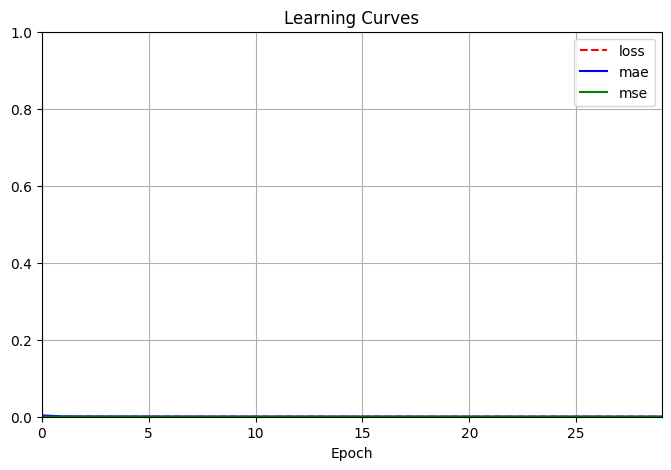

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "b-",'g'])
plt.title("Learning Curves")
plt.show()
# It is clear that the loss equals the mse